# Decoding Board from Data

In [422]:
#necessary imports
import pandas
import numpy as np
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Dense, Input
from IPython.display import display
import sympy as sp
sp.init_printing(use_latex = True)
import math

import matplotlib.pyplot as plt
%matplotlib inline

#retrieve vector data from gamestate
inputGamestate = np.array(pandas.read_table("nineFullData(2)_Validated.txt", delim_whitespace = True, header = None))

#Decoding Board From Data
board_size = 9 * 9
board_length = int(math.sqrt(board_size))
boardState = np.zeros((len(inputGamestate), (board_size)))

In [423]:
boardState.shape #Number of board states present in the data/size of board

In [424]:
#Encoding board states to 1D array per data entry

index_of_board = 0
for row in inputGamestate:
    index_of_token = 0
    for item in row:
        if index_of_token < board_size*3:
            tile = inputGamestate[index_of_board][index_of_token:index_of_token + 3]
            if(tile[2] == 1):
                boardState[index_of_board][int(index_of_token/3)] = 0 #Tile is empty
            elif(tile[1] == 1):
                boardState[index_of_board][int(index_of_token/3)] = -1 #Black occupies this tile
            elif(tile[0] == 1):
                boardState[index_of_board][int(index_of_token/3)] = 1 #White occupies this tile
            index_of_token+=3
    index_of_board+=1

In [426]:
boardState[:4] #Examples of board changing with moves that are made

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
   

# Data Categorization and Assignment

In [427]:
X = boardState[:, 0:81]

train_data = X.shape[0]

#Coordinate of move made to achieve board state (bottom left of the board being 0, 0)
#coordinate = inputGamestate[:, 243:245]

#Legality checker for the move
#legal = inputGamestate[:, 245]

#Black or white to move from this position(-1 or 1 respectively)
#whoseTurn = inputGamestate[:, 246]

#Who won from this position (-1 or 1 respectively, 0 for play continues)
#whoWon = inputGamestate[:, 247]

#Move to be made from this position
playersMove = inputGamestate[:, 248]

#Input
#X = inputGamestate[:, :248]

#Creating 81 categories based on every spot on the board, 1 representing the move to be made
Y = keras.utils.to_categorical(playersMove, len(np.unique(playersMove)))

training_samples = int(0.9 * train_data)
X_train, X_test = X[:training_samples], X[training_samples:]
Y_train, Y_test = Y[:training_samples], Y[training_samples:]

In [428]:
X[0].shape

# Building the Model

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_254 (Dense)            (None, 81)                6642      
_________________________________________________________________
reshape_19 (Reshape)         (None, 9, 9, 1)           0         
_________________________________________________________________
zero_padding2d_83 (ZeroPaddi (None, 9, 15, 7)          0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 9, 15, 48)         16512     
_________________________________________________________________
dense_255 (Dense)            (None, 9, 15, 1000)       49000     
_________________________________________________________________
dropout_74 (Dropout)         (None, 9, 15, 1000)       0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 7, 1000)      

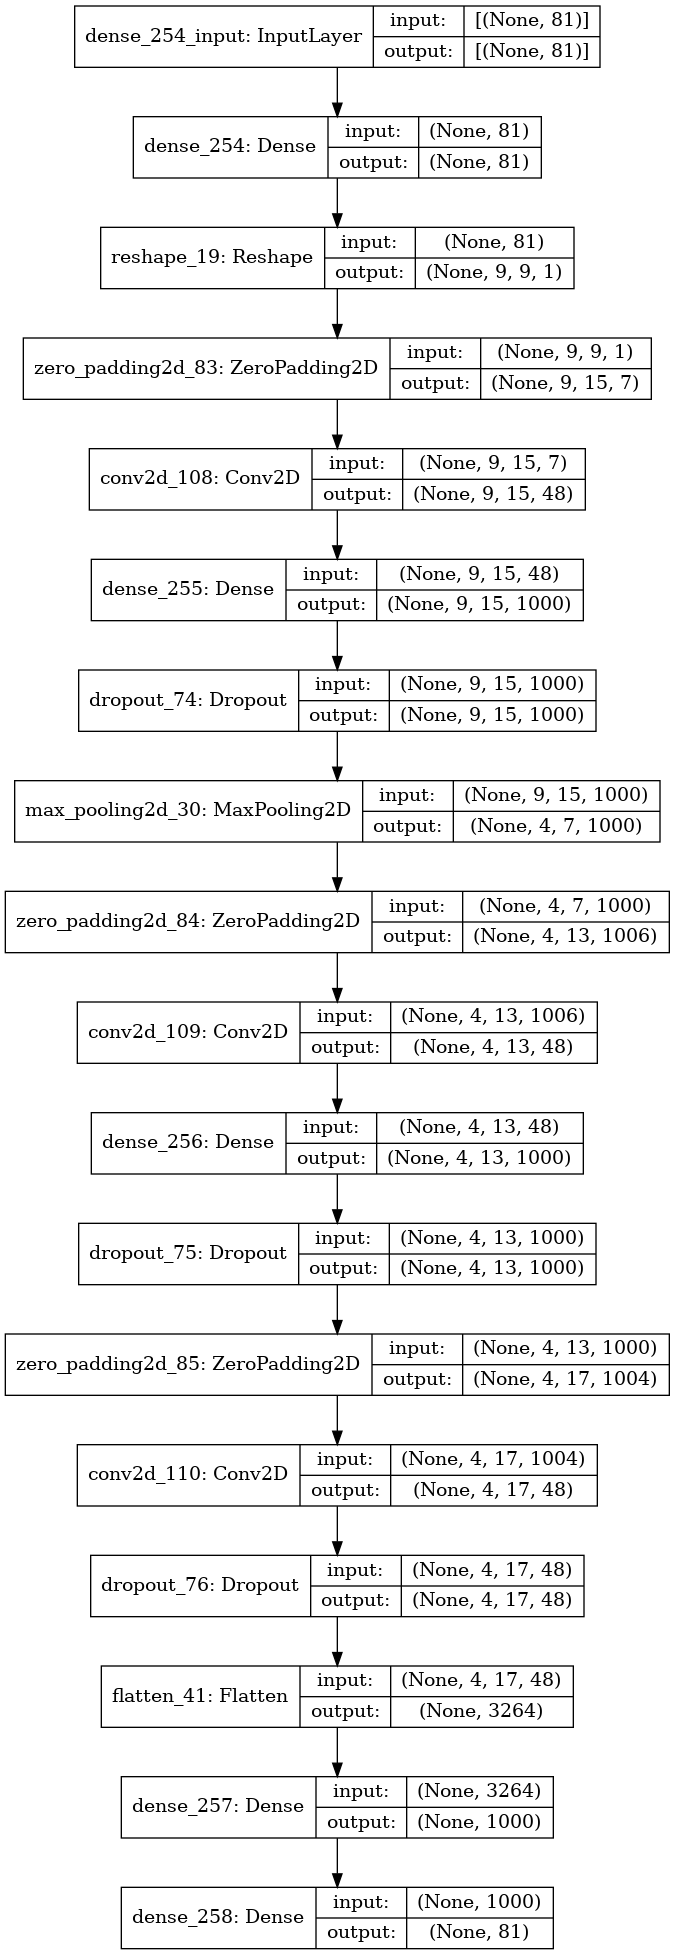

In [466]:
#defining input shape (board state)
#input_size = X.shape[1]

input_shape = X[0].shape
#defining output shape 
#output_size = Y.shape[1]
model = keras.models.Sequential()
model.add(keras.layers.Dense(81, input_shape = input_shape))
model.add(keras.layers.Reshape((board_length, board_length, 1)))
model.add(keras.layers.ZeroPadding2D(padding = 3, input_shape = input_shape, data_format = 'channels_first'))
model.add(keras.layers.Conv2D(48, kernel_size = (7, 7), activation = 'relu', padding = 'same', input_shape = input_shape))
model.add(keras.layers.Dense(1000, activation = 'relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.ZeroPadding2D(padding = 3, input_shape = input_shape, data_format = 'channels_first'))
model.add(keras.layers.Conv2D(48, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(keras.layers.Dense(1000, activation = 'relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.ZeroPadding2D(padding = 2, input_shape = input_shape, data_format = 'channels_first'))
model.add(keras.layers.Conv2D(48, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation = 'relu'))
model.add(keras.layers.Dense(board_size, activation = 'softmax'))

#hidden1 = keras.layers.Dense(1000, activation = 'relu')(conv2D_1)
#hidden2 = keras.layers.Dense(1000, activation = 'relu')(hidden1)
#hidden3 = keras.layers.Dense(1000, activation = 'relu')(hidden2)
#drop1 = keras.layers.Dropout(0.2)(hidden3)
#hidden4 = keras.layers.Dense(1000, activation = 'relu')(drop1)
#hidden5 = keras.layers.Dense(1000, activation = 'relu')(hidden4)
#output = keras.layers.Dense(82, activation = 'softmax')(hidden5)
#model = Model(inputs = conv2D_1, outputs = output)

model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer = keras.optimizers.Adam(), metrics = [keras.metrics.CategoricalAccuracy()])
model.summary()
keras.utils.plot_model(model, show_shapes = True, expand_nested = True, show_layer_names = True)

#0 if the game ends
#1 - 81
#row major order from top left, bottom right is 81

In [471]:
print(boardState[4].shape)
model_input = np.array([boardState[1]])
model.predict(model_input)

(81,)


array([[0.01233609, 0.01234434, 0.01233248, 0.01233482, 0.01236151,
        0.0123486 , 0.01234808, 0.01234993, 0.01234779, 0.01234311,
        0.01234439, 0.01234745, 0.01234547, 0.01235049, 0.0123625 ,
        0.01234259, 0.01235094, 0.01235239, 0.01235275, 0.01234136,
        0.01235293, 0.01233785, 0.01234254, 0.01234494, 0.01235266,
        0.01233532, 0.01235051, 0.01235309, 0.01234442, 0.01234188,
        0.01235118, 0.01234485, 0.01234528, 0.01233642, 0.01234027,
        0.0123475 , 0.01235608, 0.01235376, 0.01234488, 0.01234312,
        0.01233938, 0.01233929, 0.01234583, 0.01234563, 0.01234305,
        0.01234913, 0.01234639, 0.01234646, 0.01235091, 0.01235041,
        0.01234197, 0.01233532, 0.01236311, 0.01235012, 0.01234883,
        0.01234659, 0.01233987, 0.01234479, 0.01233437, 0.01234629,
        0.01234487, 0.01234312, 0.01234533, 0.01233928, 0.01233408,
        0.01235223, 0.01234925, 0.01234377, 0.01233855, 0.01234094,
        0.01233956, 0.01234165, 0.01234771, 0.01

# Training

In [437]:
#Train the model
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/10
  34/2828 [..............................] - ETA: 1:19:05 - loss: 4.9382 - categorical_accuracy: 0.0344

KeyboardInterrupt: 

In [ ]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [239]:
model.save_weights('weights.h5')